# Illustration of the sampling theorem

## The Shannon sampling theorem 
A signal $f(t)$ with Fourier transform that is zero outside $[-\omega_1, \omega_1]$ is completely described by equidistant points $f(kh)$ if the sampling frequency is higher than $2\omega_1$.

### Reconstruction
The reconstruction is given by
\begin{equation}
f(t) = \sum_{k=-\infty}^\infty f(kh) \frac{\sin (\omega_s(t-kh)/2)}{\omega_s (t-kh)/2} = \sum_{k=-\infty}^\infty f(kh) \mathrm{sinc} \frac{\omega_s(t-kh)}{2} 
\end{equation}

## Example from class, Problem 7.2 in Åström & Wittenmark
A signal $y(t)$ that we want to sample for purpose of feedback control has frequency content within the range $(-\omega_0, \omega_2$. The signal is corrupted by a sinusoidal noise at the frequency $5\omega_0$, let's assume a cosine, since its spectrum is real:
\begin{equation}
y_m(t) = y(t) + a\cos 5\omega t 
\end{equation}
What is the lowest sampling frequency we can use, and still separate the sampled sinusoid (possibly its alias frequency) from the frequency content of $y(t)$?
1. Solution in book: $\omega_s = 6\omega_0$.
2. Suggested in class: $\omega_s = 2\omega_0$.

/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Spectrum (real part)')

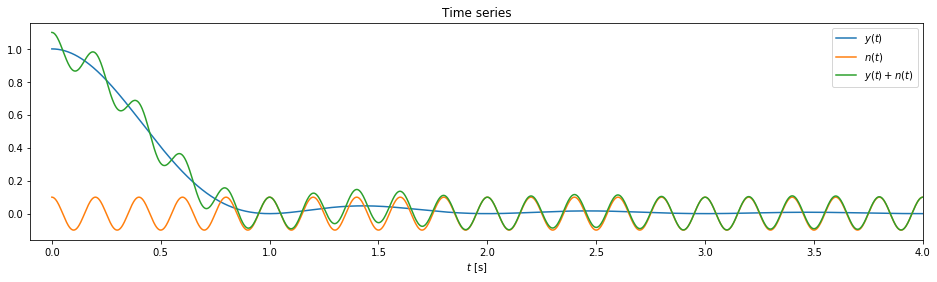

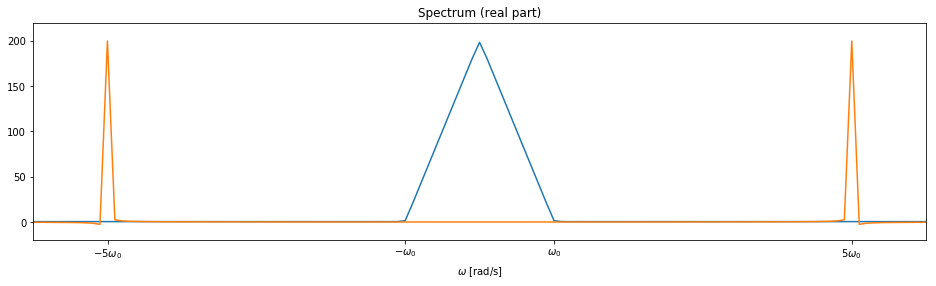

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generate signal of interest y(t). Let's use the sinc^2(t) function, which has a triangular fourier transform
# within (-2\pi, 2\pi)
def y_measurement(w0, t):
    y = np.sinc(w0*t/(2*np.pi))**2
    n = 0.1*np.cos(5*w0*t)
    return (y+n, y, n)
    
    
Nc = 4000 # Number of samples in "continuous" signal
T = 10.0 # Seconds to simulate
hc = T/Nc # Sampling frequency of "continuous" signal
wNc = np.pi/hc

t = np.linspace(0,10, Nc)
w0 = 2*np.pi

(ym, y, n) = y_measurement(w0, t)


# Fourier transforms
Yf = np.fft.fft(y)
Nf = np.fft.fft(n)
wpos = np.linspace(0,wNc, Nc/2)


# Plot signals and discrete Fourier transform 
plt.figure(figsize=(16,4))
plt.plot(t,y)
plt.plot(t,n)
plt.plot(t, y+n)
plt.xlabel(r'$t$ [s]')
plt.xlim((-0.1,4))
plt.legend((r'$y(t)$', r'$n(t)$', r'$y(t)+n(t)$'))
plt.title('Time series')

plt.figure(figsize=(16,4))
plt.plot(np.hstack((-wpos[::-1]-wpos[1], wpos)), 
         np.hstack((Yf[int(Nc/2):], Yf[:int(Nc/2)])))
plt.plot(np.hstack((-wpos[::-1]-wpos[1], wpos)), 
         np.hstack((Nf[int(Nc/2):], Nf[:int(Nc/2)])))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xlim((-6*w0, 6*w0))
plt.xticks((-5*w0, -w0, w0, 5*w0))
plt.ylim((-20, 220))
lbls=plt.gca().set_xticklabels([r'$-5\omega_0$', r'$-\omega_0$',  r'$\omega_0$', r'$5\omega_0$'])
plt.title('Spectrum (real part)')

/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Spectrum (real part)')

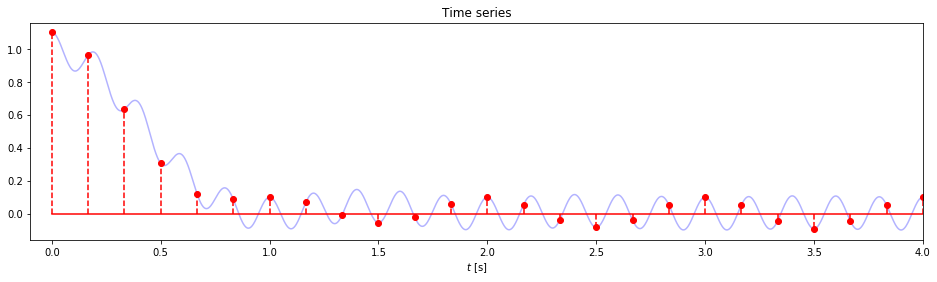

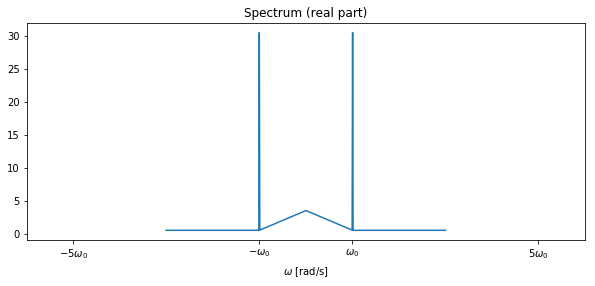

In [3]:
# Now let's sample at ws=6w0
N = 600 # Number of samples to take
ws1 = 6*w0
h1 = 2*np.pi/ws1
ts1 = np.arange(N)*h1
(ym1, y1, n1) = y_measurement(w0, ts1)

Ym1f = np.fft.fft(ym1)
wpos1 = np.linspace(0, ws1/2, N/2)

# Plot the sampled signal and its spectrum 
plt.figure(figsize=(16,4))
plt.plot(t, ym, color=[0.7, 0.7, 1])
plt.stem(ts1,ym1, linefmt='r--', markerfmt='ro', basefmt = 'r-')
plt.xlabel(r'$t$ [s]')
plt.xlim((-0.1,4))
plt.title('Time series')
plt.figure(figsize=(10,4))
plt.plot(np.hstack((-wpos1[::-1]-wpos1[1], wpos1)), 
         np.hstack((Ym1f[int(N/2):], Ym1f[:int(N/2)])))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xlim((-6*w0, 6*w0))
plt.xticks((-5*w0, -w0, w0, 5*w0))
lbls=plt.gca().set_xticklabels([r'$-5\omega_0$', r'$-\omega_0$',  r'$\omega_0$', r'$5\omega_0$'])
plt.title('Spectrum (real part)')

/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Spectrum (real part)')

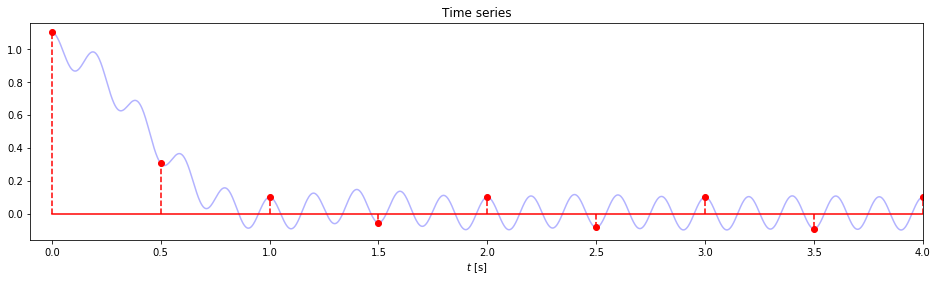

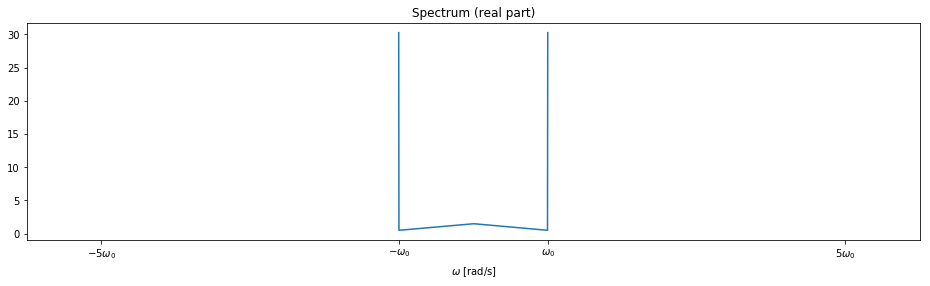

In [6]:
# And sampling at ws=2w0
N = 600 # Number of samples to take
ws2 = 2*w0
h2 = 2*np.pi/ws2
ts2 = np.arange(N)*h2
(ym2, y2, n2) = y_measurement(w0, ts2)

Ym2f = np.fft.fft(ym2)
Ym2fpos = Ym2f[:int(N/2)]
Ym2fpos[-1] = 0.5*Ym2f[int(N/2)] # Divide the energy at wN equally among the positive and negative part
Ym2fneg = Ym2f[int(N/2):]
Ym2fneg[0] /= 2.0


wpos2 = np.linspace(0, ws2/2, N/2)

# Plot the sampled signal and its spectrum 
plt.figure(figsize=(16,4))
plt.plot(t, ym, color=[0.7, 0.7, 1])
plt.stem(ts2,ym2, linefmt='r--', markerfmt='ro', basefmt = 'r-')
plt.xlabel(r'$t$ [s]')
plt.xlim((-0.1,4))
plt.title('Time series')

plt.figure(figsize=(16,4))
plt.plot(np.hstack((-wpos2[::-1]-wpos2[1], wpos2)), np.hstack((Ym2fneg, Ym2fpos)))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xlim((-6*w0, 6*w0))
plt.xticks((-5*w0, -w0, w0, 5*w0))
lbls=plt.gca().set_xticklabels([r'$-5\omega_0$', r'$-\omega_0$',  r'$\omega_0$', r'$5\omega_0$'])
plt.title('Spectrum (real part)')


## A digital notch filter to get rid of the alias of the sinusoid at $\omega_o$

A digital filter with two complex conjugated zeros at $\mathrm{e}^{\pm i \omega_n h}$ will filter out signals at the frequency $\omega_n$. In this case with $\omega_s = 2\omega_0$ we would want the zero at the Nyquist frequency, since for this case $\omega_N = \omega_0$. In order to not attenuate too much of the signal content near $\omega_0$, we combine the zero with a resonanse near the frequency, meaning two poles close to the unit circle at the frequency. How close the poles are is determined with a parameter $r < 1$. This gives the filter
\begin{equation}
H(z) = \frac{ z^2 -2\cos \omega_0 h z + 1}{z^2 - 2r\cos \omega_0 hz + r^2}
\end{equation}
With $r=0.9$, and $\omega_0 h = \pi$, this gives the filter
\begin{equation}
H(z) = \frac{(z+1)^2}{z^2 + 1.8z + 0.81} 
\end{equation}

/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Spectrum (real part) of filtered signals')

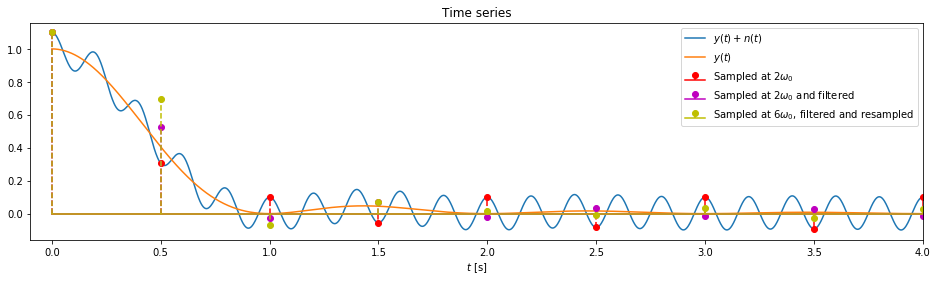

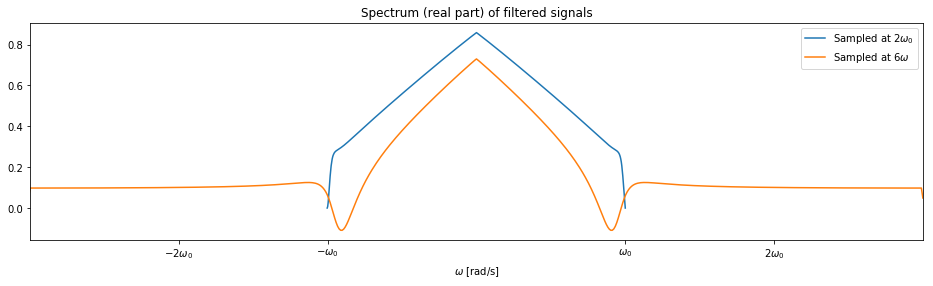

In [9]:
# So, apply a digital notch filter at w0
import scipy.signal as ss

r = 0.9
bf1 = [1, -2*np.cos(w0*h1), 1]
af1 = [1, -2*np.cos(w0*h1), r**2]
bf2 = [1, 2, 1]
af2 = [1, 2*r, r**2]

yf1 = ss.lfilter(bf1, af1, ym1)
yf2 = ss.lfilter(bf2, af2, ym2)

# Fourier transform
Yf1f = np.fft.fft(yf1)*h1
Yf1fpos = Yf1f[:int(N/2)]
Yf1fpos[-1] = 0.5*Yf1f[int(N/2)] # Divide the energy at wN equally among the positive and negative part
Yf1fneg = Yf1f[int(N/2):]
Yf1fneg[0] /= 2.0

Yf2f = np.fft.fft(yf2)*h2
Yf2fpos = Yf2f[:int(N/2)]
Yf2fpos[-1] = 0.5*Yf2f[int(N/2)] # Divide the energy at wN equally among the positive and negative part
Yf2fneg = Yf2f[int(N/2):]
Yf2fneg[0] /= 2.0


wpos2 = np.linspace(0, ws2/2, N/2)
wpos1 = np.linspace(0, ws1/2, N/2)

# Plot the sampled signal and its spectrum 
plt.figure(figsize=(16,4))
plt.plot(t, ym)
plt.plot(t, y)
plt.stem(ts2,ym2, linefmt='r--', markerfmt='ro', basefmt = 'r-')
plt.stem(ts2,yf2, linefmt='m--', markerfmt='mo', basefmt = 'm-')
plt.stem(ts1[::3],yf1[::3], linefmt='y--', markerfmt='yo', basefmt = 'y-')
plt.xlabel(r'$t$ [s]')
plt.xlim(-0.1,4)
plt.legend((r'$y(t)+n(t)$', r'$y(t)$', r'Sampled at $2\omega_0$', r'Sampled at $2\omega_0$ and filtered', 
            r'Sampled at $6\omega_0$, filtered and resampled'))
plt.title('Time series')

plt.figure(figsize=(16,4))
plt.plot(np.hstack((-wpos2[::-1]-wpos2[1], wpos2)), np.hstack((Yf2fneg, Yf2fpos)))
plt.plot(np.hstack((-wpos1[::-1]-wpos1[1], wpos1)), np.hstack((Yf1fneg, Yf1fpos)))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xlim((-3*w0, 3*w0))
plt.xticks((-2*w0, -w0, w0, 2*w0))
lbls=plt.gca().set_xticklabels([r'$-2\omega_0$', r'$-\omega_0$',  r'$\omega_0$', r'$2\omega_0$'])
plt.legend((r'Sampled at $2\omega_0$', r'Sampled at $6\omega$'))
plt.title('Spectrum (real part) of filtered signals')
